# <center>Analyzing Factors Behind Gender Wage Gap</centers>

__Goal__: To provide insightful analysis on employer factors related to the pay gap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns
%matplotlib inline

In [2]:
gpg1718 = pd.read_csv(r"C:\Users\AvantikaDG\Desktop\Wage Gap\sicwagegap1718.csv")
gpg1819 = pd.read_csv(r"C:\Users\AvantikaDG\Desktop\Wage Gap\sicwagegap1819.csv")
siccodes = pd.read_csv(r"C:\Users\AvantikaDG\Desktop\Wage Gap\SicCodes.csv")
sic_mf = pd.read_csv(r"C:\Users\AvantikaDG\Desktop\Wage Gap\sic_malefemale.csv", na_values=[' ','','*'])
uk_pay_by_age = pd.read_csv(r"C:\Users\AvantikaDG\Desktop\Wage Gap\ukPayByAgeWomen.csv")
gender_race = pd.read_csv(r"C:\Users\AvantikaDG\Desktop\Wage Gap\genderRace.csv")
location_pay = pd.read_csv(r"C:\Users\AvantikaDG\Desktop\Wage Gap\locationPay.csv")

### Datasets:
1. Gender Pay Gap Data for 2017-2018 and 2018-2019 (https://gender-pay-gap.service.gov.uk/)

In [3]:
gpg1718.head(2)

EmployerName  \
0       "Bryanston School" Incorporated   
1  "RED BAND" CHEMICAL COMPANY  LIMITED   

                                             Address CompanyNumber SicCodes  \
0  Bryanston House  Blandford  Dorset  United Kin...      00226143    85310   
1  19  Smith's Place  Leith Walk  Edinburgh  EH6 8NU      SC016876    47730   

   DiffMeanHourlyPercent  DiffMedianHourlyPercent  DiffMeanBonusPercent  \
0                   18.0                     28.2                   0.0   
1                    2.3                     -2.7                  15.0   

   DiffMedianBonusPercent  MaleBonusPercent  FemaleBonusPercent  ...  \
0                     0.0               0.0                 0.0  ...   
1                    37.5              15.6                66.7  ...   

   FemaleUpperMiddleQuartile  MaleTopQuartile  FemaleTopQuartile  \
0                       50.8             51.5               48.5   
1                       89.7             18.1               81.9   

                     CompanyLinkToGPGInfo  \
0  https://www.bryanston.co.uk/employment   
1                                     NaN   

                                 ResponsiblePerson  EmployerSize  \
0  Nick McRobb (Bursar and Clerk to the Governors)    500 to 999   
1                  Philip Galt (Managing Director)    250 to 499   

                            CurrentName  SubmittedAfterTheDeadline  \
0       "Bryanston School" Incorporated                      False   
1  "RED BAND" CHEMICAL COMPANY  LIMITED                      False   

               DueDate        DateSubmitted  
0  05/04/2018 00:00:00  27/03/2018 11:42:49  
1  05/04/2018 00:00:00  28/03/2018 16:44:25  

[2 rows x 25 columns]

In [4]:
print("Columns:")
list(gpg1718.columns)

Columns:


['EmployerName',
 'Address',
 'CompanyNumber',
 'SicCodes',
 'DiffMeanHourlyPercent',
 'DiffMedianHourlyPercent',
 'DiffMeanBonusPercent',
 'DiffMedianBonusPercent',
 'MaleBonusPercent',
 'FemaleBonusPercent',
 'MaleLowerQuartile',
 'FemaleLowerQuartile',
 'MaleLowerMiddleQuartile',
 'FemaleLowerMiddleQuartile',
 'MaleUpperMiddleQuartile',
 'FemaleUpperMiddleQuartile',
 'MaleTopQuartile',
 'FemaleTopQuartile',
 'CompanyLinkToGPGInfo',
 'ResponsiblePerson',
 'EmployerSize',
 'CurrentName',
 'SubmittedAfterTheDeadline',
 'DueDate',
 'DateSubmitted']

2. SIC Codes and their Names (https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/527619/SIC07_CH_condensed_list_en.csv/preview)

In [5]:
siccodes.head(3)

SIC Code                                        Description
0      1110  Growing of cereals (except rice), leguminous c...
1      1120                                    Growing of rice
2      1130  Growing of vegetables and melons, roots and tu...

3. Self Employed Males and Females per SIC Sector (https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/adhocs/0069114digitsicindustrycodesbyselfemployedstatussplitbymaleandfemales)
Assumption: These figures are representative of salaried employees

In [6]:
sic_mf.head(3)

Code                                Desc    Male  Female
0  1110     Growing of cereals, except rice  1538.0     NaN
1  1120                     Growing of rice     NaN     NaN
2  1130  Grwng veg & melons, roots & tubers  1530.0   654.0

4. Aggregate Salary of Women per Age Group ()

In [7]:
uk_pay_by_age.head(3)

Age  All  FullTime  PartTime  PartTimePerc
0      16-17 -2.4       9.0       0.0            93
1      18-21  1.4       1.9       0.2            62
2      22-29  6.4       1.3       0.1            28

5. Weekly Median Income of Races and Genders in 2017 and 2018 (https://www.bls.gov/cps/cpsaat37.pdf)

In [8]:
gender_race.head(3)

Race  Gender  Year  MedianWeekly
0  White    Male  2017           971
1  White  Female  2017           795
2  White    Male  2018          1002

6. Median Weekly Salary of Men and Women based on location for 2017 (https://data.london.gov.uk/dataset/earnings-workplace-borough)

In [9]:
location_pay.head(3)

Area  femaleWeekly2017  maleWeekly2017
0        City of London             799.6          1149.9
1  Barking and Dagenham             493.2           656.1
2                Barnet             542.2           657.7

Let us check out the data for 2017-2018 for UK companies' salary! A little bit of EDA will help us understand the data and the problem at hand better. What are the highest, lowest and median wage gaps?

In [33]:
# What are the highest, lowest and median wage gaps? (Based off median pay)
print("The highest wage gap is:",max(gpg1718.DiffMedianHourlyPercent))
print("The lowest wage gap is:",min(gpg1718.DiffMedianHourlyPercent))
print("The average wage gap is:",round(np.mean(gpg1718.DiffMedianHourlyPercent),2))
print("It turns out that the biggest difference in median hourly percent is when a woman earns more!")
print("But, in the average case, men earn ~12% more per hour - which leads us to believe that maybe these high pro-women wage gaps exist in certain female-dominated industries (verifiable)")
print("The top 10 wage gaps where women earn more are:",np.sort(gpg1718.DiffMedianHourlyPercent)[0:20])
print("The top 10 wage gaps where men earn more are:", -np.sort(-gpg1718.DiffMedianHourlyPercent)[0:20])

The highest wage gap is: 121.2
The lowest wage gap is: -196.5
The average wage gap is: 11.79
It turns out that the biggest difference in median hourly percent is when a woman earns more!
But, in the average case, men earn ~12% more per hour - which leads us to believe that maybe these high pro-women wage gaps exist in certain female-dominated industries (verifiable)
The top 10 wage gaps where women earn more are: [-196.5 -164.  -103.6 -100.1  -85.2  -85.2  -81.9  -81.3  -80.6  -80.6
  -77.   -76.   -74.3  -61.4  -61.   -57.9  -57.5  -56.   -55.8  -54.8]
The top 10 wage gaps where men earn more are: [121.2  97.   79.8  75.7  73.   71.8  71.   69.   68.5  68.2  68.1  67.5
  67.4  66.   65.9  65.8  65.3  65.   65.   63.7]


Now let's go to the 2018-2019 data!

In [36]:
# What are the highest, lowest and median wage gaps? (Based off median pay)
print("The highest wage gap is:",max(gpg1819.DiffMedianHourlyPercent))
print("The lowest wage gap is:",min(gpg1819.DiffMedianHourlyPercent))
print("The average wage gap is:",round(np.mean(gpg1819.DiffMedianHourlyPercent),2))
print("It turns out that the biggest difference in median hourly percent is when a woman earns more, but the numbers are less drastic than the previous cycle.")
print("The average case has gone from a wage gap of $11.79 to $11.16. Although an improvement, it is not very significant.")
print("The top 10 wage gaps where women earn more are:",np.sort(gpg1819.DiffMedianHourlyPercent)[0:20])
print("The top 10 wage gaps where men earn more are:", -np.sort(-gpg1819.DiffMedianHourlyPercent)[0:20])

The highest wage gap is: 79.3
The lowest wage gap is: -90.7
The average wage gap is: 11.16
It turns out that the biggest difference in median hourly percent is when a woman earns more, but the numbers are less drastic than the previous cycle.
The average case has gone from a wage gap of $11.79 to $11.16. Although an improvement, it is not very significant.
The top 10 wage gaps where women earn more are: [-90.7 -80.7 -67.5 -59.2 -53.9 -52.5 -45.8 -44.3 -41.3 -39.  -38.6 -38.
 -38.  -36.4 -36.4 -36.2 -33.6 -32.7 -32.3 -31.9]
The top 10 wage gaps where men earn more are: [79.3 66.  66.  66.  65.  64.8 63.2 62.  60.8 60.7 59.9 59.7 59.  58.
 58.  57.4 57.4 57.  56.6 55.5]


Now that we have a general feel of this dataset and the kind of numbers, let's drill-down on another level. SIC Codes are indicators of a company's sector. One company may belong to more then one sector. Let us examine if the wage gap has a relationship with the sector of the company...

In [37]:
sics = []
siccounts = dict()
for index, row in gpg1718.iterrows():
    sics = str(row.SicCodes).split(sep = " ")
    for code in sics:
        if code in siccounts.keys():
            siccounts[code] = siccounts[code] + 1
        else:
            if code != 'nan' and code != '' and code != ' ':
                siccounts[code] = 1
sorted_x = sorted(siccounts.items(), key=operator.itemgetter(1), reverse=True)
sorted_sics = pd.DataFrame(sorted_x, columns = ["Code", "Count"])
siccodes = siccodes.astype({"SIC Code": str})

In [38]:
sic_mapped = siccodes.merge(sorted_sics, left_on='SIC Code', right_on='Code')
sic_mapped = sic_mapped.sort_values('Count', ascending=False)
top_sic = sic_mapped.head(10).Code
diff_top_sics = dict()
diff_top_sics_codes = dict()
for code in top_sic:
    code_desc = siccodes.Description[siccodes['SIC Code']==code]
    diff_top_sics[list(code_desc)[0]] = np.mean(gpg1718.DiffMedianHourlyPercent[gpg1718.SicCodes.str.contains(str(code), na=False)])
    diff_top_sics_codes[str(code)] = np.mean(gpg1718.DiffMedianHourlyPercent[gpg1718.SicCodes.str.contains(str(code), na=False)])

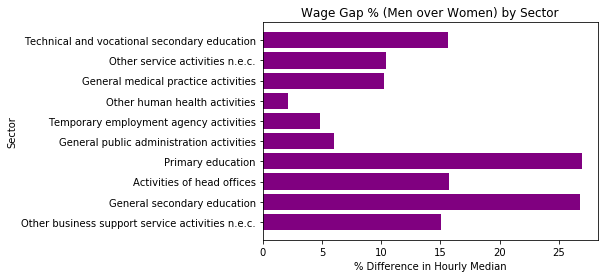

In [39]:
plt.barh(list(diff_top_sics.keys()), list(diff_top_sics.values()), color = "purple")
plt.title("Wage Gap % (Men over Women) by Sector")
plt.xlabel("% Difference in Hourly Median")
plt.ylabel("Sector");

It looks like there is a general trend of women getting paid less than men (no negative figures in this chart). We have taken the 10 most populated sectors (based on number of companies) to try and see whether we can derive any insights from this data. 

The lowest wage gap of ~2.5% is in health activities, while the highest are in primary education and general secondary education. This is an interesting insight, considering the ratio of females to males in the field of primary education is approximately 3:1 (verifiable in dataset sic_mf).

The next step is to analyze the relationship between proportion of males and females in a field with wage gap.

In [40]:
sic_mf_notnull = sic_mf[pd.notnull(sic_mf["Male"]) & pd.notnull(sic_mf["Female"])]
ratio = dict()
for index, row in sic_mf_notnull.iterrows():
    if str(row.Code) in top_sic.to_list():
        ratio[str(row.Code)] = row.Male/row.Female
s = sorted(diff_top_sics_codes)
sector = []
ratios = []
wagegap = []
for sic in s:
    sector.append(sic)
    ratios.append(ratio[sic])
    wagegap.append(diff_top_sics_codes[sic])
ratios=np.divide(1, ratios)

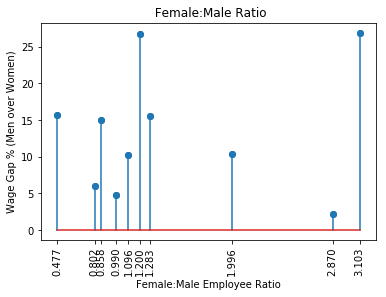

In [41]:
plt.scatter(ratios, wagegap)
plt.stem(ratios,wagegap)
plt.title(" Female:Male Ratio")
plt.xlabel("Female:Male Employee Ratio")
plt.ylabel("Wage Gap % (Men over Women)")
plt.xticks(ratios, rotation = (90));
#No trend

We have taken the same top 10 sectors and found the female : male ratio in each of them, along with the wage gap. It seems like there is no discernable relationship between the proportion of males and females and the wage gap in a sector based on this sample. Perhaps extensive sampling will yield better results.

So, we move on to another employer attribute that intuitively seems like a probable factor that contributes to wage gap - Size of the company (in terms of employees). In general, we assume that companies with more employees have greater revenue and more stringent HR policies around equality and non-discrimination (which is why the employees remain). 

In [42]:
sizecounts = dict()
for index, row in gpg1718.iterrows():
    size = str(row.EmployerSize)
    if size in sizecounts.keys():
        sizecounts[size] = sizecounts[size] + 1
    else:
        if size != 'nan' and size != '' and size != ' ':
            sizecounts[size] = 1
wagegaps = []
for size in sizecounts.keys():
    wagegaps.append(np.mean(gpg1718.DiffMedianHourlyPercent[gpg1718.EmployerSize == size]))

In [43]:
sizecounts.keys()
szcnt = ['Not Provided', 'Less than 250', '250 to 499','500 to 999', '1000 to 4999', '5000 to 19 999', '20 000 or more']
wg = [wagegaps[4],wagegaps[5], wagegaps[1], wagegaps[0], wagegaps[3], wagegaps[2], wagegaps[6]]

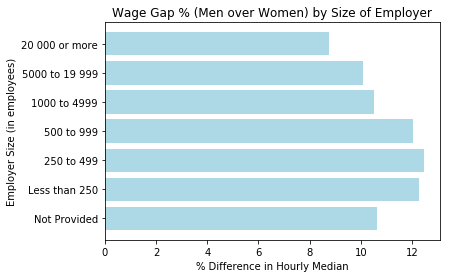

In [45]:
plt.barh(szcnt, wg, color = "lightblue")
plt.title("Wage Gap % (Men over Women) by Size of Employer")
plt.xlabel("% Difference in Hourly Median")
plt.ylabel("Employer Size (in employees)");

Well, it turns out that common sense has a part to play in analytics (I hope sampling doesn't prove me wrong!). We see a regular decline in the wage gap with increasing number of employees in companies. Had these bins been more granular, we might have been able to visualize the trend with more data points. However, it is quite convincing that the size of the company causes a fall in wage gap between men and women!

This leads us to wonder, what other factors could contribute to this? Let's have a look at age.

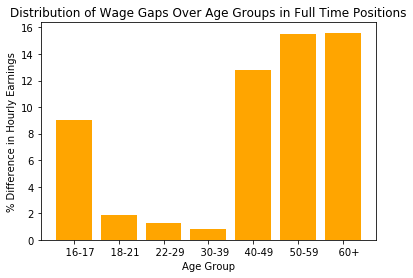

In [21]:
plt.bar(uk_pay_by_age.Age, uk_pay_by_age.FullTime, color = "orange")
plt.ylabel("% Difference in Hourly Earnings")
plt.xlabel("Age Group")
plt.title("Distribution of Wage Gaps Over Age Groups in Full Time Positions");
# 18-39 kam ho gaya - not cuz of family commitments

Now, we can clearly see that for ages 18-39 the wage gap is quite low. This could be due to a number of reasons. My hypothesis is:
- Those who are 40 and above have been working since a time when the issue of wage gap was not in the forefront. These salaries were not corrected based on modern research about wage gaps

But, one thing we can definitely conclude from this chart is that marriage and children and other family commitments do non contribute to wage gaps as much as one might assume. 25-35 is the general age (assumption) that most women give birth to their children. These years fall in the bins with least wage gap. Maternity leaves and family commitments do not have an impact on salary.

When we talk about discrimination, we think of two aspects:
- Sex
- Race

Race could be a contributing factor to wage gap in today's world. Let's have a look.

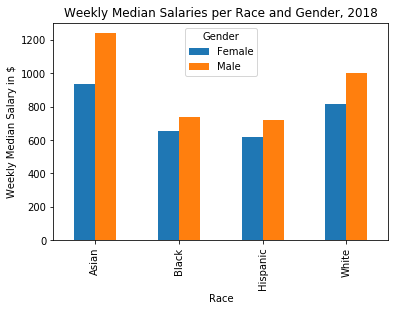

In [46]:
gender_race[gender_race.Year == 2018].pivot("Race", "Gender", "MedianWeekly").plot(kind='bar')
plt.title('Weekly Median Salaries per Race and Gender, 2018')
plt.xlabel("Race")
plt.ylabel("Weekly Median Salary in $");

While we see that different races are paid differently, it is a general trend that women are paid less than men of the same race. We observe here that the lesser the overall pay of a race, the lesser is the gap between the salaries of men and women. Asian men get paid the most, but there is utter disparity between the men and women - while men get paid over $1200 weekly, women earn less than $1000. However, this is on an absolute scale, and it may be worth the while to check the percentage difference. 

Lastly, for this analysis we want to consider location. Although we have data only for London, we still would like to discuss how location might play a part in determining wage gap.

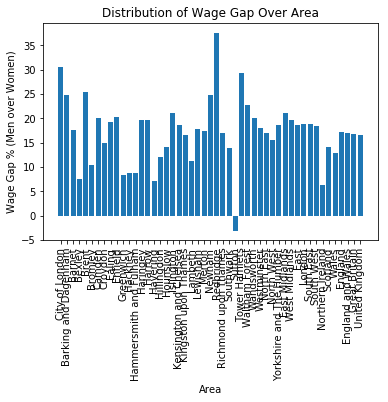

In [47]:
diff = np.divide(np.subtract(location_pay.maleWeekly2017, location_pay.femaleWeekly2017), location_pay.maleWeekly2017) * 100
plt.bar(location_pay.Area, diff)
plt.xticks(rotation = (90));
plt.xlabel("Area")
plt.ylabel("Wage Gap % (Men over Women)")
plt.title("Distribution of Wage Gap Over Area");

London follows the trend of men earninng more than women, exception in the town of Sutton. What factors might lead to that are boyond the scope of this analysis; however, it could prove useful to dig deep into locational influences. London City , being an urban hotspot has the second highest wage gap (in percentage). This may be due to the excessive number of people who are employed there. It may not be feasible to correct the wage gap issue as quick as one might want to. 

In [25]:
location_pay['diff'] =diff
location_pay.sort_values('diff', ascending=False)

In [48]:
location_pay.sort_values('diff', ascending=False)

Area  femaleWeekly2017  maleWeekly2017       diff
25                 Redbridge             394.3           631.4  37.551473
0             City of London             799.6          1149.9  30.463519
29             Tower Hamlets             734.3          1037.4  29.217274
4                      Brent             468.7           628.1  25.378125
24                    Newham             480.4           639.1  24.831795
1       Barking and Dagenham             493.2           656.1  24.828532
30            Waltham Forest             493.8           639.4  22.771348
36             East Midlands             430.4           545.9  21.157721
18                 Islington             665.1           843.3  21.131270
9                    Enfield             491.0           615.7  20.253370
31                Wandsworth             563.0           704.9  20.130515
6                     Camden             628.6           785.8  20.005090
37             West Midlands             451.4           562.0  19.679715
14                    Harrow             496.2           617.7  19.669743
13                  Haringey             513.7           639.2  19.633917
8                     Ealing             502.6           622.7  19.286976
40                South East             504.0           621.5  18.905873
39                    London             622.9           766.6  18.745108
19    Kensington and Chelsea             561.6           689.9  18.596898
38                      East             478.4           587.5  18.570213
35  Yorkshire and The Humber             442.7           543.5  18.546458
41                South West             459.8           563.4  18.388356
32               Westminster             670.8           818.1  18.005134
22                  Lewisham             538.5           654.6  17.736022
2                     Barnet             542.2           657.7  17.561198
23                    Merton             540.4           654.0  17.370031
45                   England             496.4           599.4  17.183851
26      Richmond upon Thames             542.4           654.2  17.089575
46         England and Wales             493.5           595.2  17.086694
33                North East             452.3           545.1  17.024399
47             Great Britain             494.0           594.1  16.849015
20      Kingston upon Thames             519.7           622.9  16.567667
48            United Kingdom             493.6           591.5  16.551141
34                North West             464.6           550.1  15.542629
7                    Croydon             555.5           653.0  14.931087
43                  Scotland             498.3           579.9  14.071392
17                  Hounslow             597.3           695.0  14.057554
27                 Southwark             659.2           766.6  14.009914
44                     Wales             457.6           525.1  12.854694
16                Hillingdon             587.0           667.5  12.059925
21                   Lambeth             648.4           731.3  11.335977
5                    Bromley             525.7           586.8  10.412406
12    Hammersmith and Fulham             651.3           714.2   8.807057
11                   Hackney             611.3           669.6   8.706691
10                 Greenwich             565.8           617.8   8.416963
3                     Bexley             554.2           599.6   7.571714
15                  Havering             544.3           586.2   7.147731
42          Northern Ireland             482.4           514.9   6.311905
28                    Sutton             571.7           554.9  -3.027573

Lastly, we'd like to showcase Google's study of gender pay gap. Although the proportion of employees receiving bonus is same for men and women, the gap in hourly and bonus pay is highly disappointing. However, Google has acknowledged the importance of closing this gap, and has chalked out a plan to do so. It is important in today's world that leading companies take the initative to make their industries a non-discriminative place to be, so that others can follow and realize this vision of equality. (https://static.googleusercontent.com/media/diversity.google/en//static/pdf/uk-gender-pay-report-2017.pdf)

![Wage Gap](google.JPG)